Code has now been absorbed into MainCode.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [2]:
input_sacc = 'xCell_output/real_data2/output/cls_cov.fits' # input sacc file
output_dir = 'xCell_output/real_data2/' # directory to output power spectra plot to

In [3]:
s = sacc.Sacc.load_fits(input_sacc)

s.remove_selection(ell__gt=352)

In [4]:
s.tracers

{'IceCube__0': <sacc.tracers.MapTracer at 0x7faa48fb7460>,
 'IceCube__1': <sacc.tracers.MapTracer at 0x7faa48fb7490>,
 'IceCube__2': <sacc.tracers.MapTracer at 0x7faa48fb77f0>,
 'LOWZ__0': <sacc.tracers.NZTracer at 0x7faa48fb79a0>,
 'LOWZ__1': <sacc.tracers.NZTracer at 0x7faa48fb7df0>,
 'LOWZ__2': <sacc.tracers.NZTracer at 0x7faa48fb7d90>,
 'LOWZ__3': <sacc.tracers.NZTracer at 0x7faa48fb7820>,
 'LOWZ__4': <sacc.tracers.NZTracer at 0x7faa48fb7070>,
 'LOWZ__5': <sacc.tracers.NZTracer at 0x7faa48fb78b0>}

<ErrorbarContainer object of 3 artists>

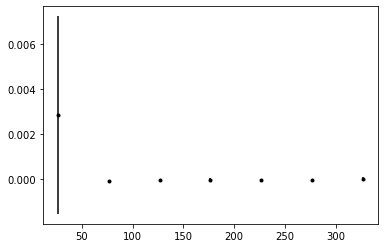

In [5]:
l, cl, cov = s.get_ell_cl('cl_00', 'IceCube__0', 'LOWZ__0', return_cov=True)
plt.errorbar(l, l*cl, yerr=l*np.sqrt(np.diag(cov)), fmt='k.')

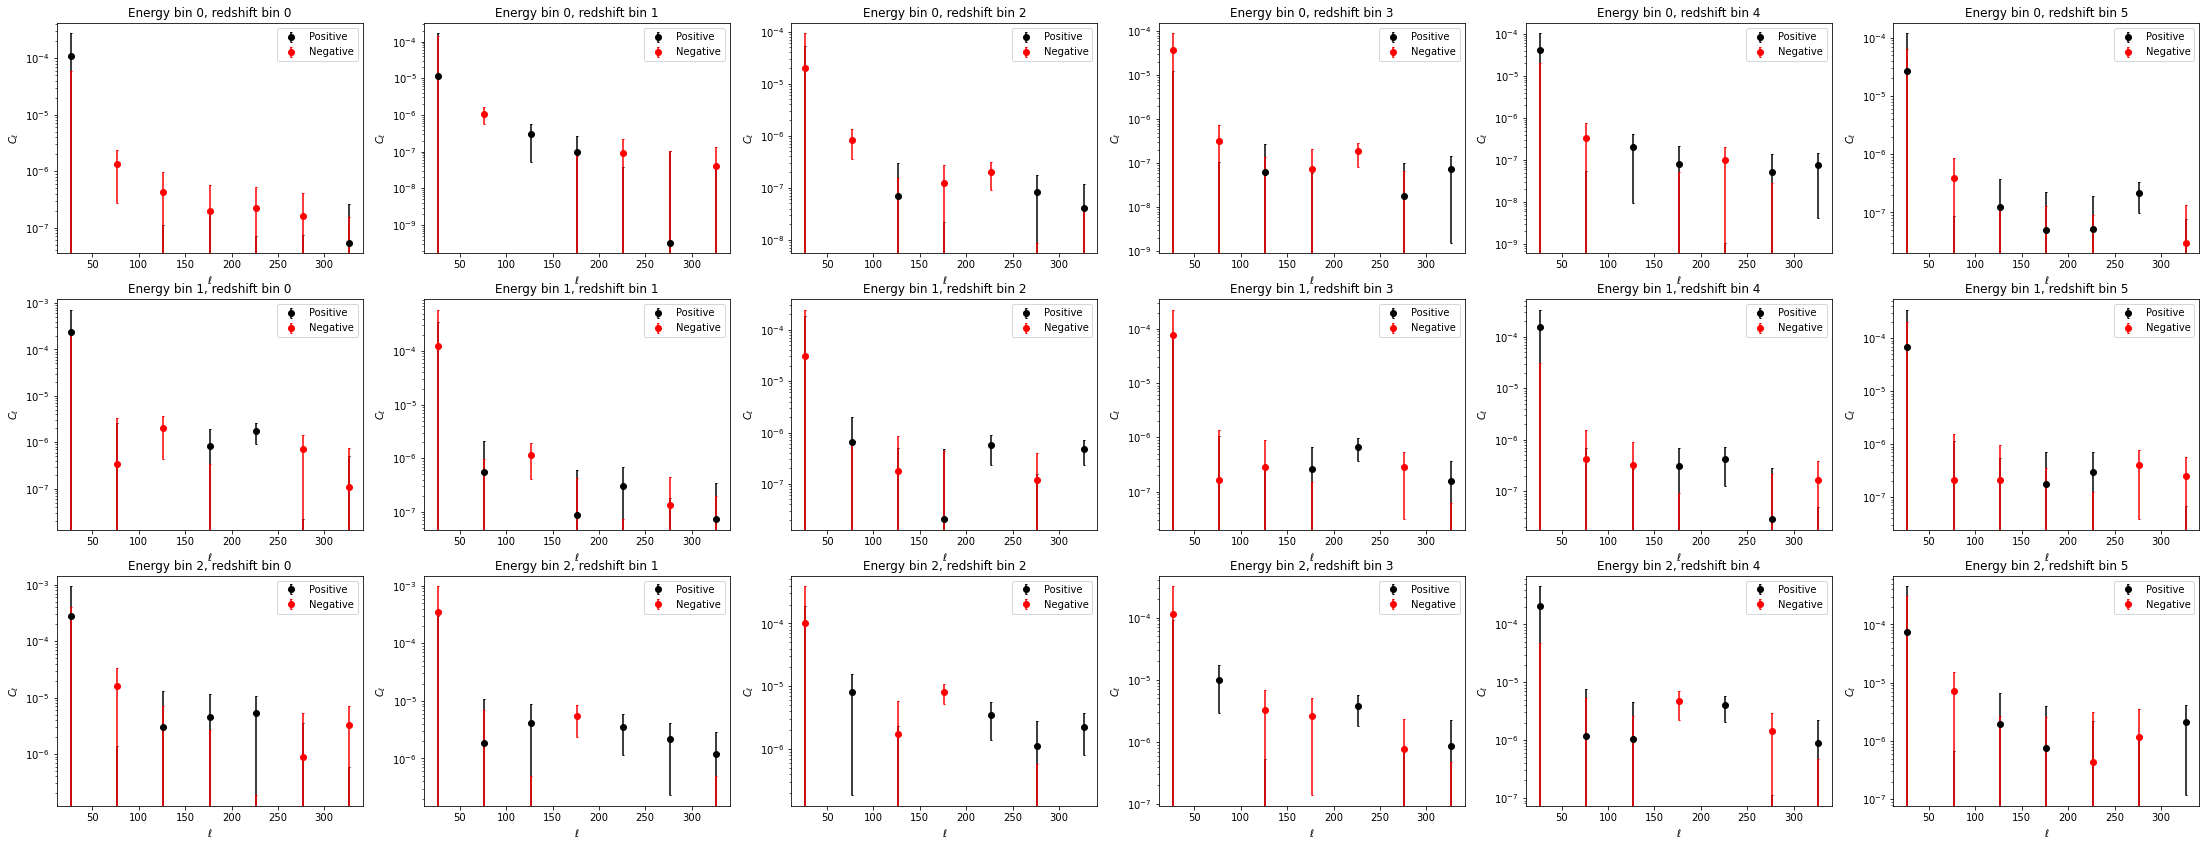

In [6]:
#creates grid of subfigures
fig, axs = plt.subplots(3, 6, figsize = (6.4*6, 4.8*3))

for i in range(3):
    for j in range(6):
        # One plot for each cross-correlation
        l, cl, cov = s.get_ell_cl('cl_00', f'IceCube__{i}', f'LOWZ__{j}', return_cov=True)
        axs[i,j].errorbar(l, cl, yerr = np.sqrt(np.diag(cov)), capsize = 1, 
                          fmt = 'o', label = 'Positive', c = 'k')
        axs[i,j].errorbar(l, -cl, yerr = np.sqrt(np.diag(cov)), capsize = 1, 
                          fmt = 'o', label = 'Negative', c = 'r')
        # Plot formatting
        axs[i,j].set_yscale('log')
        axs[i,j].set_title(f'Energy bin {i}, redshift bin {j}')
        axs[i,j].set_xlabel('$\ell$')
        axs[i,j].set_ylabel('$C_\ell$')
        axs[i,j].legend()

#plt.savefig(output_dir+'xCellPowerSpectra.pdf')